In [1]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm
from patsy import dmatrices
import statsmodels.formula.api as smf

In [2]:
dataset=pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Auto.csv')
print(dataset)

      mpg  cylinders  displacement  horsepower  weight  acceleration  year  \
0    18.0          8         307.0         130    3504          12.0    70   
1    15.0          8         350.0         165    3693          11.5    70   
2    18.0          8         318.0         150    3436          11.0    70   
3    16.0          8         304.0         150    3433          12.0    70   
4    17.0          8         302.0         140    3449          10.5    70   
..    ...        ...           ...         ...     ...           ...   ...   
387  27.0          4         140.0          86    2790          15.6    82   
388  44.0          4          97.0          52    2130          24.6    82   
389  32.0          4         135.0          84    2295          11.6    82   
390  28.0          4         120.0          79    2625          18.6    82   
391  31.0          4         119.0          82    2720          19.4    82   

     origin                       name  
0         1  chevrolet

In [3]:
#adding categorical variables
dataset.origin[dataset.origin == 1] = "A"
dataset.origin[dataset.origin == 2] = "B"
dataset.origin[dataset.origin == 3] = "C"
dataset.head()

<ipython-input-3-f3bab44ec164>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.origin[dataset.origin == 1] = "A"


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,A,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,A,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,A,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,A,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,A,ford torino


In [4]:
y,x = dmatrices('mpg ~ cylinders + displacement + horsepower + weight +acceleration + year+ origin', data=dataset, return_type='dataframe')

9a

In [5]:
from pandas.plotting import scatter_matrix #remember this way to plot scatter matrix

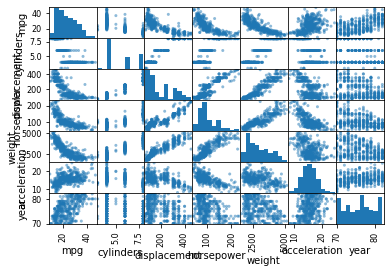

In [6]:
scatter_matrix(dataset.drop(columns = ["name"]))
plt.show()

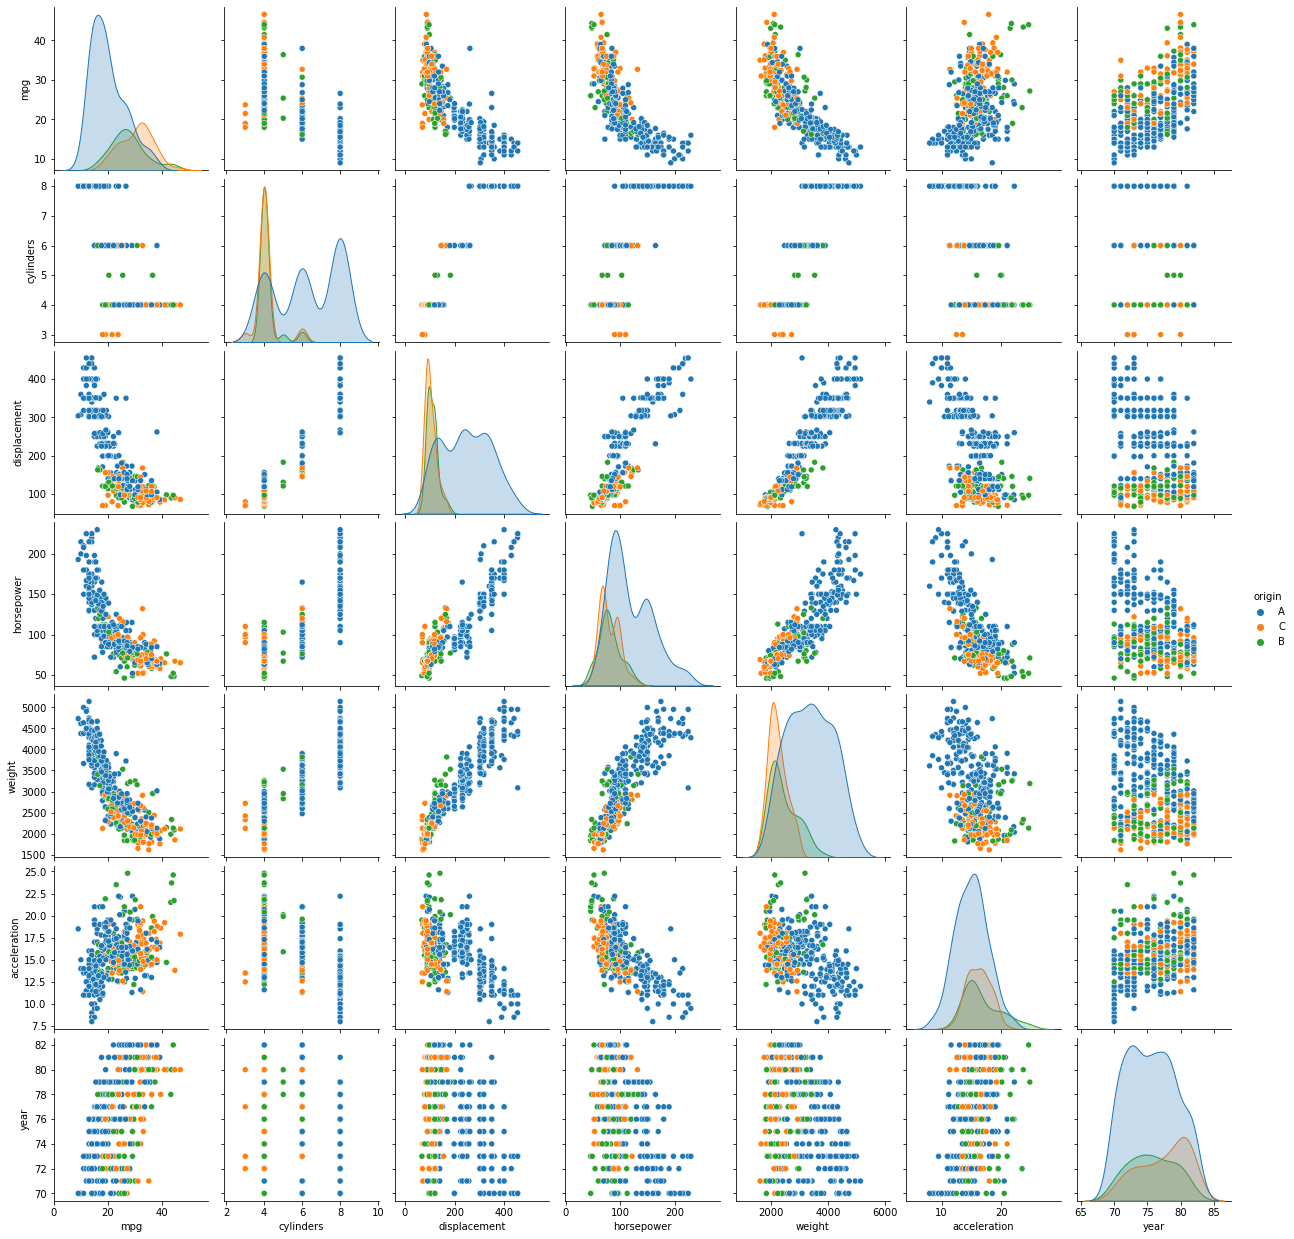

In [7]:
seabornInstance.pairplot(dataset,hue = "origin")#another way  to plot scatter matrix

9b

In [9]:
dataset.corr()#function to calculate correlation matrix

,mpg,cylinders,displacement,horsepower,weight,acceleration,year
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316
year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000


In [10]:
mod = sm.OLS(y, x)

In [11]:
res=mod.fit()

In [12]:
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     224.5
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          1.79e-139
Time:                        16:29:18   Log-Likelihood:                -1020.5
No. Observations:                 392   AIC:                             2059.
Df Residuals:                     383   BIC:                             2095.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      -17.9546      4.677     -3.839   

9ci)Yes there is a relationship in the variables except cylinders,horsepower and acceleration
9cii)origin,displacement,weight,year
9ciii)forevery 1000 year increase the mpg increases by 7770 units

In [13]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

In [14]:
lr=LinearRegression()

In [15]:
lr.fit(x_train,y_train)

LinearRegression()

In [16]:
pred_yt=lr.predict(x_train)

In [17]:
pred_y=lr.predict(x_test)

9d

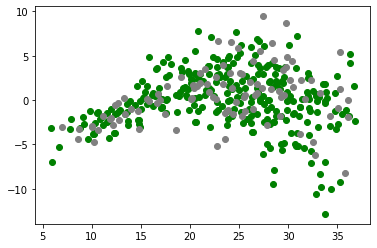

In [18]:
plt.scatter(pred_yt,pred_yt-y_train,color='green')
plt.scatter(pred_y, pred_y-y_test,  color='gray')
plt.show()

In [19]:
model_norm_residuals = res.get_influence().resid_studentized_internal

In [20]:
model_leverage = res.get_influence().hat_matrix_diag

Text(0, 0.5, 'studentized residual')

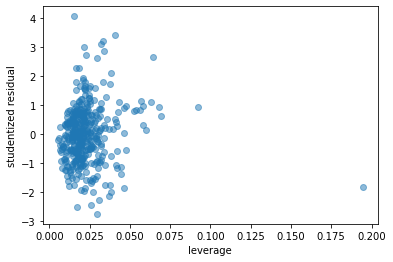

In [21]:
plt.scatter(model_leverage, model_norm_residuals, alpha=0.5)
plt.xlabel("leverage")
plt.ylabel("studentized residual")

        The observaton having  |std residual|>3 are basically outliers.in this 5 outliers and 1 point is having a very high leverage

9e)

In [28]:
res2=smf.ols('mpg ~ cylinders + displacement + horsepower + weight +acceleration + year+ origin+displacement*cylinders+acceleration*horsepower',data=dataset).fit()


In [29]:
print(res2.summary())

                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.854
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     222.2
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          3.23e-152
Time:                        16:41:58   Log-Likelihood:                -984.56
No. Observations:                 392   AIC:                             1991.
Df Residuals:                     381   BIC:                             2035.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

In [ ]:
9f)

In [31]:



dataset['horsepower2'] =dataset.horsepower**2
dataset.head(3)





est = smf.ols('mpg ~ horsepower + horsepower2', dataset).fit()
est.summary().tables[1]




dataset['horsepower_half'] = dataset.horsepower**0.5
dataset.head()




est = smf.ols('mpg ~ horsepower + horsepower2+ horsepower_half', dataset).fit()
est.summary().tables[1]






mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower2", data = dataset)
res_all = mod_all.fit()
print(res_all.summary())





dataset['horsepower_log'] =np.log(dataset.horsepower) 
dataset.head()














                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     251.5
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          1.47e-154
Time:                        16:44:39   Log-Likelihood:                -981.87
No. Observations:                 392   AIC:                             1984.
Df Residuals:                     382   BIC:                             2023.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        1.1492      4.733      0.243   

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,horsepower2,horsepower_half,horsepower_log
0,18.0,8,307.0,130,3504,12.0,70,A,chevrolet chevelle malibu,16900,11.401754,4.867534
1,15.0,8,350.0,165,3693,11.5,70,A,buick skylark 320,27225,12.845233,5.105945
2,18.0,8,318.0,150,3436,11.0,70,A,plymouth satellite,22500,12.247449,5.010635
3,16.0,8,304.0,150,3433,12.0,70,A,amc rebel sst,22500,12.247449,5.010635
4,17.0,8,302.0,140,3449,10.5,70,A,ford torino,19600,11.832160,4.941642


C:\Users\divyansh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divyansh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\divyansh\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


                            OLS Regression Results                            
Dep. Variable:                    mpg   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.856
Method:                 Least Squares   F-statistic:                     232.7
Date:                Sun, 11 Apr 2021   Prob (F-statistic):          1.72e-155
Time:                        16:44:42   Log-Likelihood:                -976.78
No. Observations:                 392   AIC:                             1976.
Df Residuals:                     381   BIC:                             2019.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept         92.2648     29.139      3.

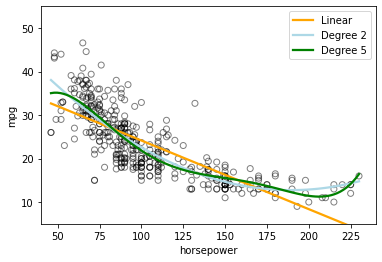

In [32]:
#remember and understand these commands to  understand effects of different powers
plt.scatter(dataset.horsepower, dataset.mpg, facecolors='None', edgecolors='k', alpha=.5) 
seabornInstance .regplot(dataset.horsepower, dataset.mpg, ci=None, label='Linear', scatter=False, color='orange')
seabornInstance .regplot(dataset.horsepower, dataset.mpg, ci=None, label='Degree 2', order=2, scatter=False, color='lightblue')
seabornInstance .regplot(dataset.horsepower, dataset.mpg, ci=None, label='Degree 5', order=5, scatter=False, color='g')
plt.legend()
plt.ylim(5,55)
plt.xlim(40,240);




mod_all = smf.ols("mpg~cylinders+displacement+horsepower+weight+acceleration+year+origin+horsepower2+horsepower_log", data = dataset)
res_all = mod_all.fit()
print(res_all.summary())

